# 1. Khởi tạo các thư viện cần thiết

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from glob import glob
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import models
from PIL import Image
import random
from skimage import io
from tensorflow.keras.metrics import BinaryIoU

# 2. Khởi Tạo Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/brain/MRI_BRAIN_DATASET.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_9_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_13.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_

In [ ]:
# khởi tạo 2 mảng chứa đường dẫn image và mask
images = []
mask = glob('../content/lgg-mri-segmentation/kaggle_3m/*/*_mask*')

for i in mask:
    images.append(i.replace('_mask',''))

print(images[:5])
print('-------------------')
print(mask[:5])

['../content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_18.tif', '../content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_10.tif', '../content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_11.tif', '../content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_14.tif', '../content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_12.tif']
-------------------
['../content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_18_mask.tif', '../content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_10_mask.tif', '../content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_11_mask.tif', '../content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_14_mask.tif', '../content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_12_mask

In [ ]:
def diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path))
    return '1' if value > 0 else '0'
data = pd.DataFrame({"image_path": images,
                   "mask_path": mask,
                  "diagnosis":[diagnosis(x) for x in mask]})
data.head()

,image_path,mask_path,diagnosis
0,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,0
1,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,1
2,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,1
3,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,1
4,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,1


In [ ]:
# Dataframe
brain_df = pd.DataFrame({
                        "image_path": images,
                         "mask_path": mask
                        })
def pos_neg_diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path))
    if value > 0 :
        return 1
    else:
        return 0

brain_df['mask'] = brain_df['mask_path'].apply(lambda x: pos_neg_diagnosis(x))
brain_df

,image_path,mask_path,mask
0,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,0
1,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,1
2,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,1
3,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,1
4,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,1
...,...,...,...
3924,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,0
3925,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,1
3926,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,0
3927,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,../content/lgg-mri-segmentation/kaggle_3m/TCGA...,1


# 3. Hiển Thị Dữ liệu

In [ ]:
brain_df['mask'].value_counts()

0    2556
1    1373
Name: mask, dtype: int64

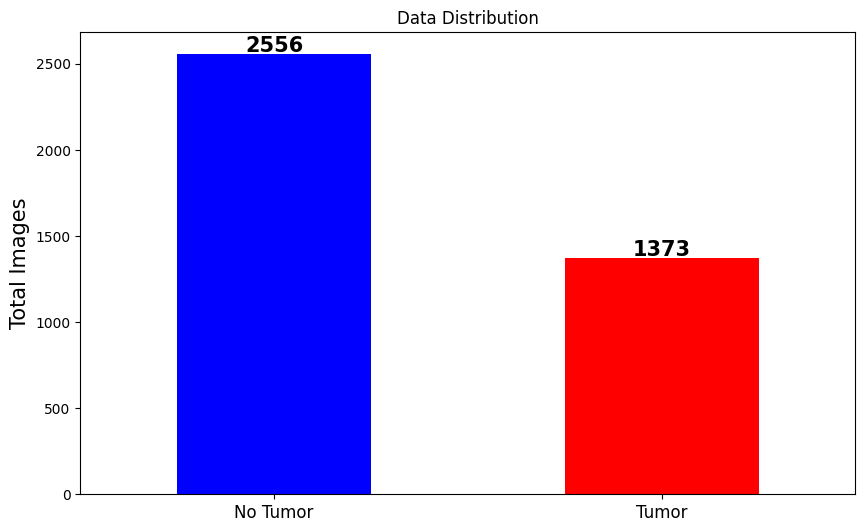

In [ ]:
ax = brain_df['mask'].value_counts().plot(kind='bar', figsize=(10,6), color=['blue', 'red'])
ax.set_title('Data Distribution')
ax.set_ylabel('Total Images', fontsize=15)
ax.set_xticklabels(['No Tumor', 'Tumor'], fontsize=12, rotation=0)
for i, rows in enumerate(brain_df['mask'].value_counts().values):
    ax.annotate(int(rows), xy=(i, rows+12), ha='center', fontweight='bold', fontsize=15)

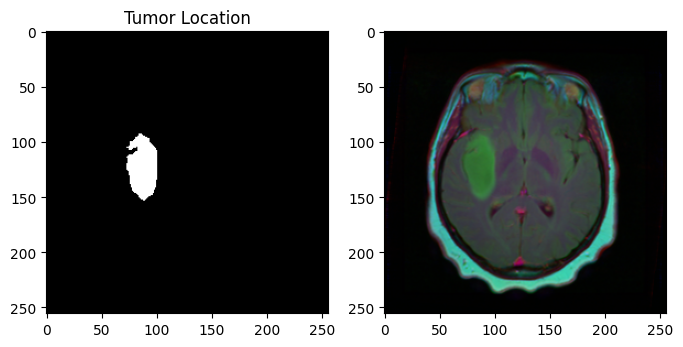

In [ ]:
for i in range(len(brain_df)):
    if cv2.imread(brain_df.mask_path[i]).max() > 0:
        break

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(cv2.imread(brain_df.mask_path[i]));
plt.title('Tumor Location')

plt.subplot(1,2,2)
plt.imshow(cv2.imread(brain_df.image_path[i]));

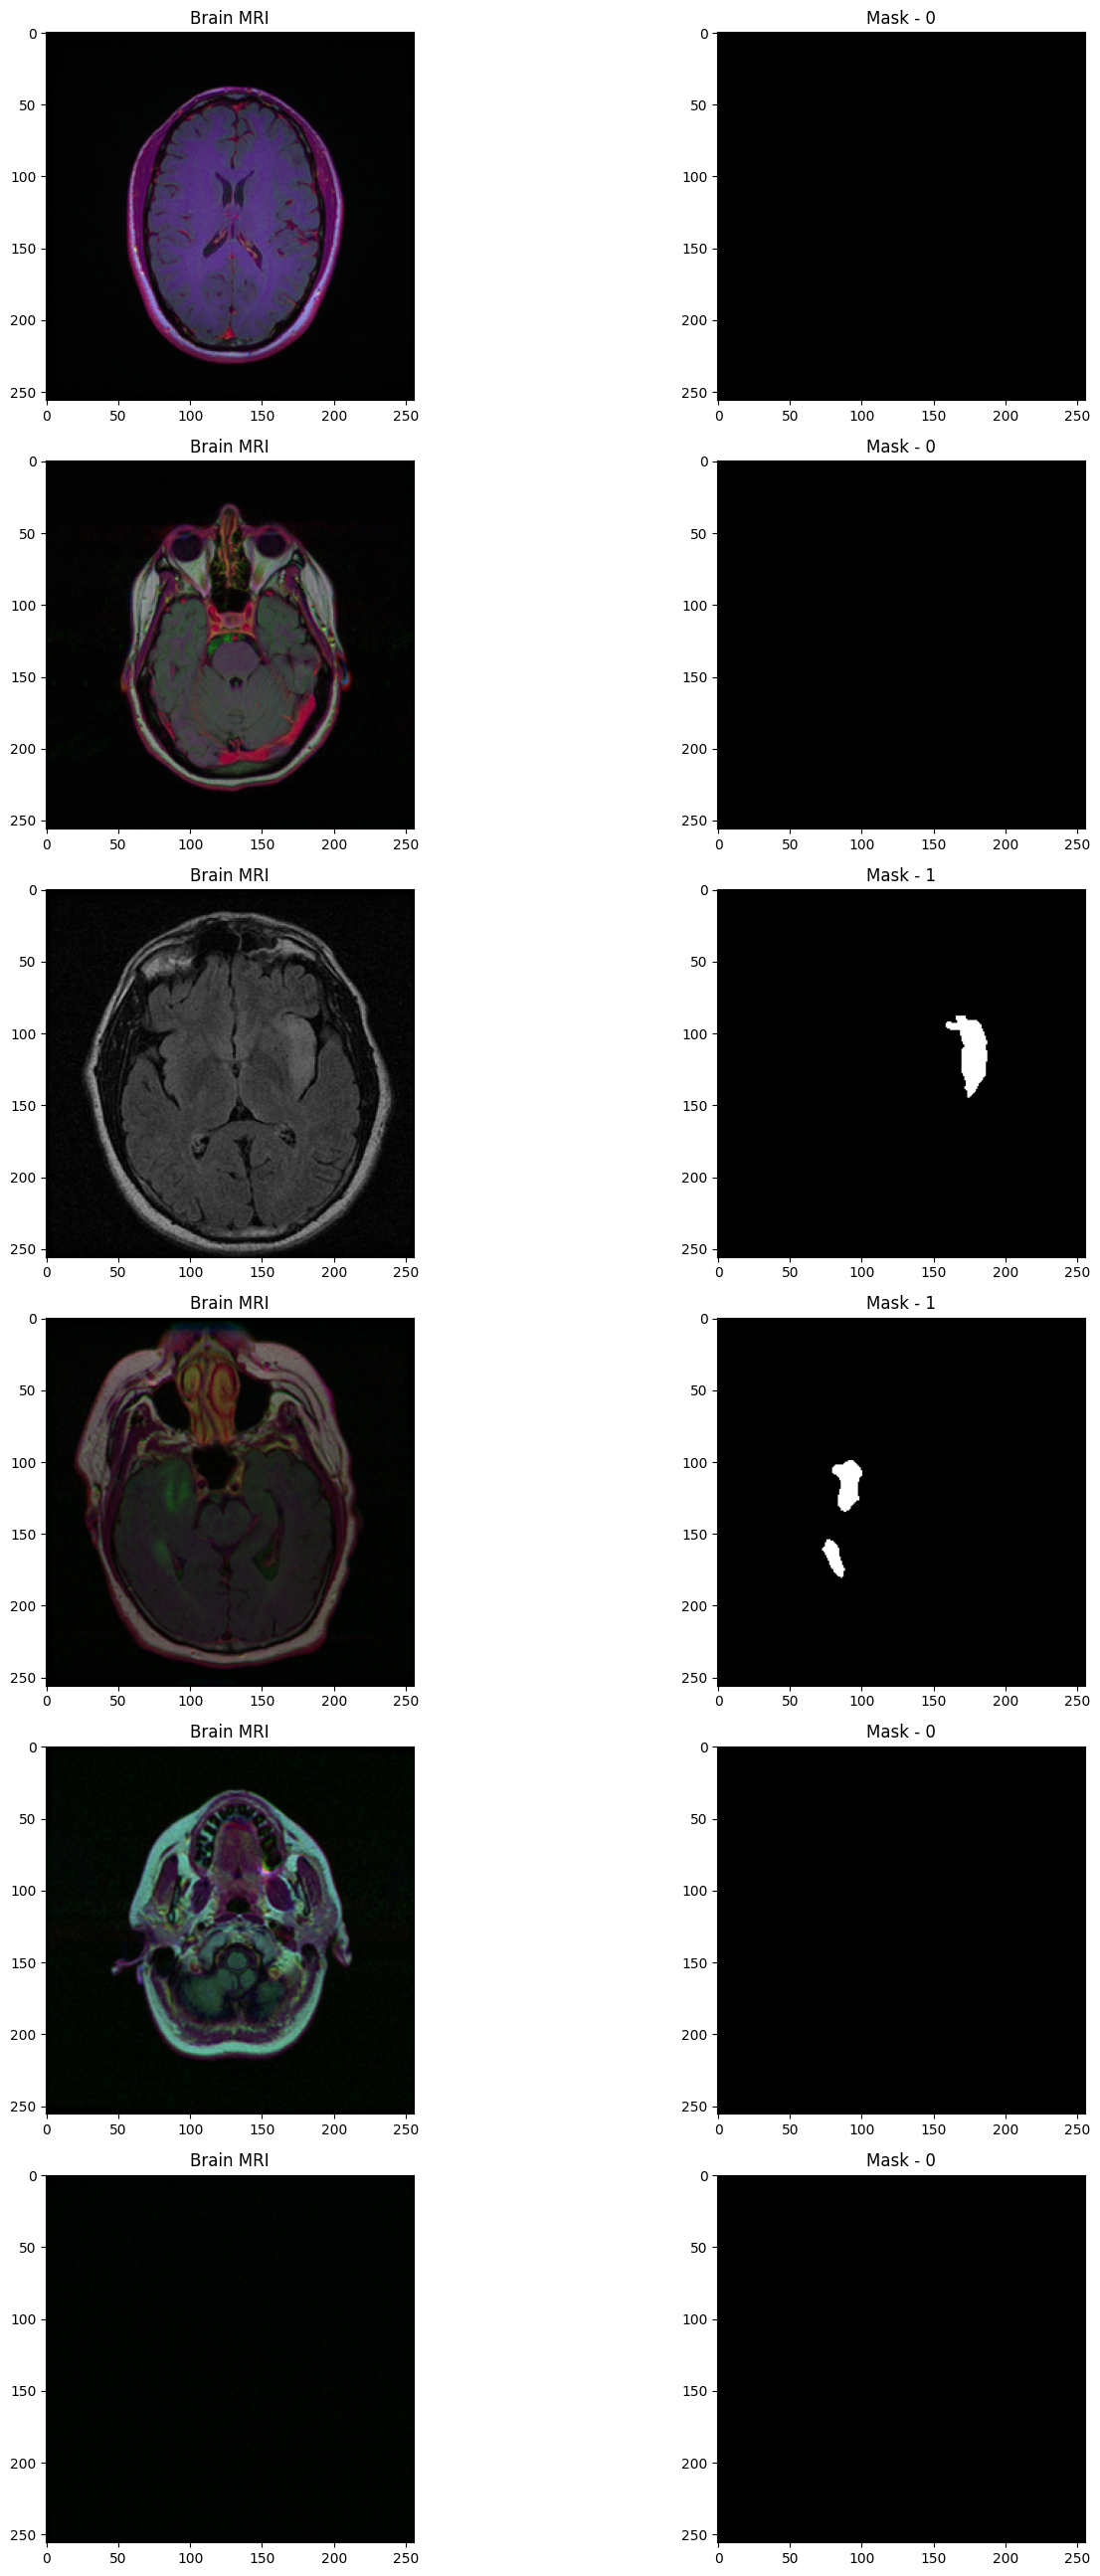

In [ ]:
#Hiển thị ảnh ( MRI và Mask ) trong dataset

fig, axs = plt.subplots(6,2, figsize=(16,26))
count = 0
for x in range(6):
  i = random.randint(0, len(brain_df)) # chọn ngẫu nhiên 1 index trong images
  axs[count][0].title.set_text("Brain MRI") # set title
  axs[count][0].imshow(cv2.imread(brain_df.image_path[i])) # show MRI
  axs[count][1].title.set_text("Mask - " + str(brain_df['mask'][i])) # Hiển thị mask quyết định nhãn (0 or 1)
  axs[count][1].imshow(cv2.imread(brain_df.mask_path[i])) # Hiển thị mask tương ứng
  count += 1

fig.tight_layout()

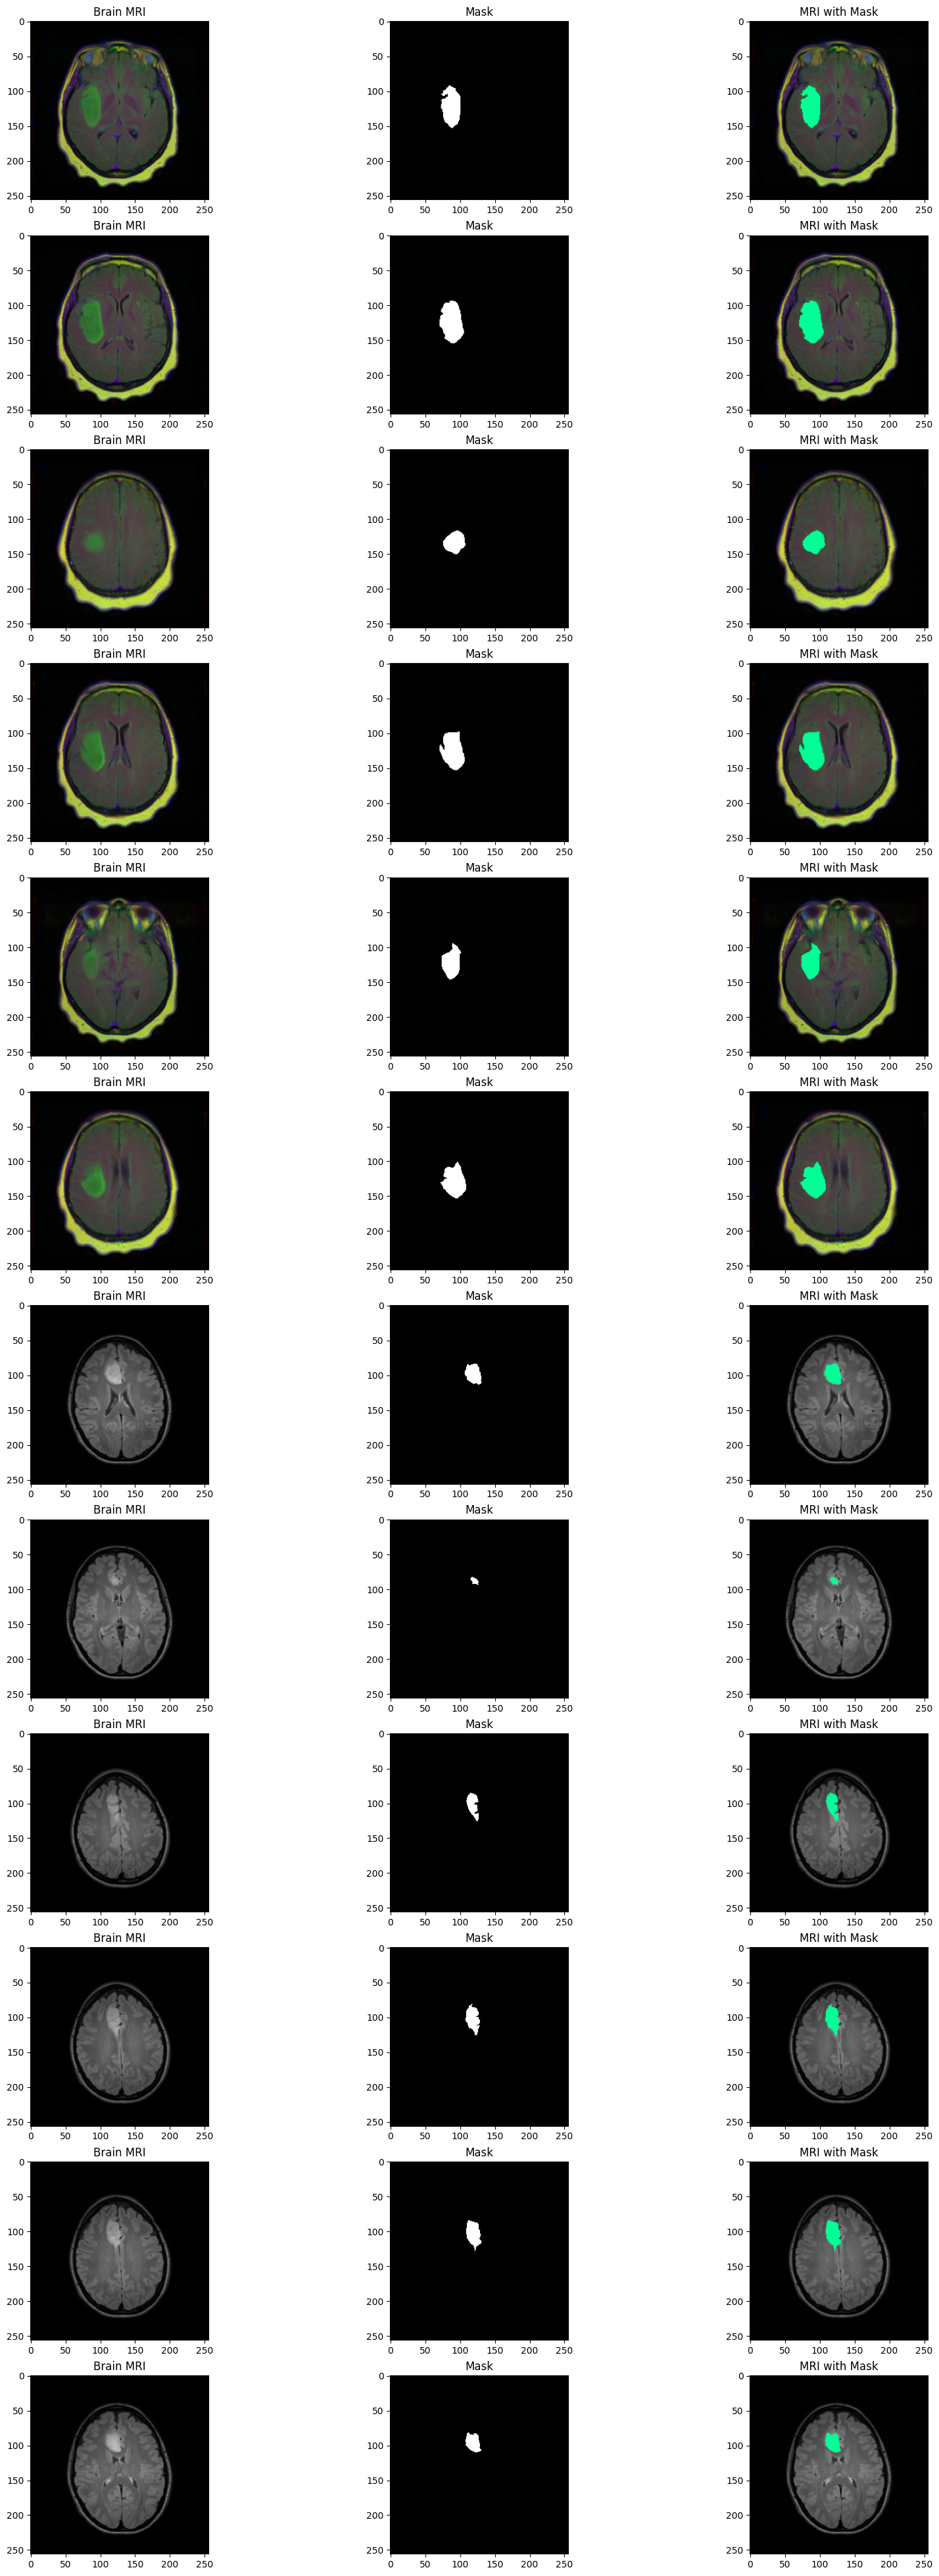

In [ ]:
count = 0
i = 0
fig,axs = plt.subplots(12,3, figsize=(20,50))
for mask in brain_df['mask']:
    if (mask==1):
        img = io.imread(brain_df.image_path[i])
        axs[count][0].title.set_text("Brain MRI")
        axs[count][0].imshow(img)

        mask = io.imread(brain_df.mask_path[i])
        axs[count][1].title.set_text("Mask")
        axs[count][1].imshow(mask, cmap='gray')

        img[mask==255] = (0,255,150)  # thay đổi vùng chứa khối ung thư thành màu xanh
        axs[count][2].title.set_text("MRI with Mask")
        axs[count][2].imshow(img)
        count +=1
    i += 1
    if (count==12):
        break


# 4. Khởi Tạo Tập Train, Val và Test

In [ ]:
data=brain_df
data['mask'] = data['mask'].apply(lambda x: str(x))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [ ]:
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.1)

data_train,data_val=train_test_split(data_train,test_size=0.2)

In [ ]:
datagen = ImageDataGenerator(#rotation_range=0.2,
                            #width_shift_range=0.05,
                            #height_shift_range=0.05,
                            #shear_range=0.05,
                            #zoom_range=0.05,
                            #horizontal_flip=True,
                            #fill_mode='nearest',
                            rescale=1./255.)

In [ ]:
image_train=datagen.flow_from_dataframe(data_train,
                                    target_size=(256,256),
                                    color_mode='rgb',
                                    shuffle=True,
                                    seed=42,
                                    x_col ="image_path",
                                    batch_size=32,
                                    class_mode=None

)
mask_train=datagen.flow_from_dataframe(data_train,
                                    target_size=(256,256),
                                    color_mode='grayscale',
                                    shuffle=True,
                                    seed=42,
                                    x_col ="mask_path",
                                    batch_size=32,
                                    class_mode=None
)

Found 2828 validated image filenames.
Found 2828 validated image filenames.


In [ ]:
image_validation=datagen.flow_from_dataframe(data_val,
                                    target_size=(256,256),
                                    color_mode='rgb',
                                    shuffle=True,
                                    seed=42,
                                    x_col ="image_path",
                                    batch_size=32,
                                    class_mode=None
)

mask_validation=datagen.flow_from_dataframe(data_val,
                                    target_size=(256,256),
                                    color_mode='grayscale',
                                    shuffle=True,
                                    seed=42,
                                    x_col ="mask_path",
                                    batch_size=32,
                                    class_mode=None
)
test_datagen = ImageDataGenerator(rescale=1./255.)
image_test=test_datagen.flow_from_dataframe(data_test,
                                    target_size=(256,256),
                                    color_mode='rgb',
                                    shuffle=True,
                                    seed=42,
                                    x_col ="image_path",
                                    batch_size=32,
                                    class_mode=None
)

mask_test=test_datagen.flow_from_dataframe(data_test,
                                    target_size=(256,256),
                                    color_mode='grayscale',
                                    shuffle=True,
                                    seed=42,
                                    x_col ="mask_path",
                                    batch_size=32,
                                    class_mode=None
)

Found 708 validated image filenames.
Found 708 validated image filenames.
Found 393 validated image filenames.
Found 393 validated image filenames.


In [ ]:
train_gen=zip(image_train,mask_train)
valid_gen=zip(image_validation,mask_validation)
test_gen=zip(image_test,mask_test)

# 5. Xây dựng Model, mạng Unet

In [ ]:
def unet(input_size=(256,256,3)):
    inputs = layers.Input(input_size)

    conv1 = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    bn1 = layers.Activation('relu')(conv1)
    conv1 = layers.Conv2D(64, (3, 3), padding='same')(bn1)
    bn1 = layers.BatchNormalization(axis=3)(conv1)
    bn1 = layers.Activation('relu')(bn1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(bn1)

    conv2 = layers.Conv2D(128, (3, 3), padding='same')(pool1)
    bn2 = layers.Activation('relu')(conv2)
    conv2 = layers.Conv2D(128, (3, 3), padding='same')(bn2)
    bn2 = layers.BatchNormalization(axis=3)(conv2)
    bn2 = layers.Activation('relu')(bn2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(bn2)

    conv3 = layers.Conv2D(256, (3, 3), padding='same')(pool2)
    bn3 = layers.Activation('relu')(conv3)
    conv3 = layers.Conv2D(256, (3, 3), padding='same')(bn3)
    bn3 = layers.BatchNormalization(axis=3)(conv3)
    bn3 = layers.Activation('relu')(bn3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(bn3)

    conv4 = layers.Conv2D(512, (3, 3), padding='same')(pool3)
    bn4 = layers.Activation('relu')(conv4)
    conv4 = layers.Conv2D(512, (3, 3), padding='same')(bn4)
    bn4 = layers.BatchNormalization(axis=3)(conv4)
    bn4 = layers.Activation('relu')(bn4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(bn4)

    conv5 = layers.Conv2D(1024, (3, 3), padding='same')(pool4)
    bn5 = layers.Activation('relu')(conv5)
    conv5 = layers.Conv2D(1024, (3, 3), padding='same')(bn5)
    bn5 = layers.BatchNormalization(axis=3)(conv5)
    bn5 = layers.Activation('relu')(bn5)

    up6 = layers.concatenate([layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(bn5), conv4], axis=3)
    conv6 = layers.Conv2D(512, (3, 3), padding='same')(up6)
    bn6 = layers.Activation('relu')(conv6)
    conv6 = layers.Conv2D(512, (3, 3), padding='same')(bn6)
    bn6 = layers.BatchNormalization(axis=3)(conv6)
    bn6 = layers.Activation('relu')(bn6)

    up7 = layers.concatenate([layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(bn6), conv3], axis=3)
    conv7 = layers.Conv2D(256, (3, 3), padding='same')(up7)
    bn7 = layers.Activation('relu')(conv7)
    conv7 = layers.Conv2D(256, (3, 3), padding='same')(bn7)
    bn7 = layers.BatchNormalization(axis=3)(conv7)
    bn7 = layers.Activation('relu')(bn7)

    up8 = layers.concatenate([layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(bn7), conv2], axis=3)
    conv8 = layers.Conv2D(128, (3, 3), padding='same')(up8)
    bn8 = layers.Activation('relu')(conv8)
    conv8 = layers.Conv2D(128, (3, 3), padding='same')(bn8)
    bn8 = layers.BatchNormalization(axis=3)(conv8)
    bn8 = layers.Activation('relu')(bn8)

    up9 = layers.concatenate([layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(bn8), conv1], axis=3)
    conv9 = layers.Conv2D(64, (3, 3), padding='same')(up9)
    bn9 = layers.Activation('relu')(conv9)
    conv9 = layers.Conv2D(64, (3, 3), padding='same')(bn9)
    bn9 = layers.BatchNormalization(axis=3)(conv9)
    bn9 = layers.Activation('relu')(bn9)

    conv10 = layers.Conv2D(1, (1, 1), activation='sigmoid')(bn9)

    return models.Model(inputs=[inputs], outputs=[conv10])

In [ ]:
model = unet(input_size=(256, 256, 3))

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 activation (Activation)        (None, 256, 256, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[BinaryIoU(target_class_ids=[1],threshold=0.5),'accuracy'])

# 6. Trainning

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10,
    validation_steps=len(data_val) /32,
    steps_per_epoch=len(data_train) /32
)

Epoch 1/10
88/88 [==============================] - 224s 2s/step - loss: 0.1739 - binary_io_u: 0.0380 - accuracy: 0.9643 - val_loss: 0.0976 - val_binary_io_u: 0.0000e+00 - val_accuracy: 0.9901
Epoch 2/10
18/88 [=====>........................] - ETA: 1:42 - loss: 0.0657 - binary_io_u: 0.0960 - accuracy: 0.9892

In [ ]:
# saving model achitecture in h5 file
model.save('my_model.h5')

In [ ]:
#model = tf.keras.models.load_model("/content/my_model.h5")

In [ ]:
loss ,iou,acc = model.evaluate(valid_gen, steps=len(data_val) /32, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

# 7. Đánh Giá Kết Quả

In [ ]:
eval_results = model.evaluate(valid_gen, steps=len(data_val) /32, verbose=1)

In [ ]:
plt.figure(figsize=[10,8])
plt.title("Loss Function")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="o", color="b", label="best point")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend()
# plt.grid(False)
plt.show()

plt.figure(figsize=[10,8])
plt.title("accuracy")
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Dice Coefficient")
plt.legend()
# plt.grid(False)
plt.show()

plt.figure(figsize=[10,8])
plt.title("Loss Function")

plt.title('Training and validation Jacard')
plt.plot(history.history["binary_io_u"], 'y', label='Training Jacard')
plt.plot(history.history['val_binary_io_u'], 'r', label='Validation Jacard')

plt.xlabel('Epochs')
plt.ylabel('Jacard')
plt.legend()
plt.show()

In [ ]:
_,_, acc = model.evaluate(test_gen,steps=len(data_test) /32, verbose=1)
print("Test accuracy : {} %".format(acc*100))

In [ ]:
import cv2
for i in range(30):
    index=np.random.randint(1,len(data_test.index))
    img = cv2.imread(data_test['image_path'].iloc[index])
    img = cv2.resize(img ,(256, 256))
    img = img / 255
    img = img[np.newaxis, :, :, :]
    pred=model.predict(img)

    plt.figure(figsize=(10,10))
    plt.subplot(1,4,1)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')
    plt.subplot(1,4,2)
    plt.imshow(np.squeeze(cv2.imread(data_test['mask_path'].iloc[index])))
    plt.title('Original Mask')
    plt.subplot(1,4,3)
    plt.imshow(np.squeeze(pred) > .5)
    plt.title('Prediction')
    plt.subplot(1,4,4)
    plt.imshow(np.squeeze(img))
    plt.imshow(np.squeeze(pred)>.5,alpha=0.4)
    plt.title('Image with prediction mask')
    plt.show()
